In [1]:
# Built-in library
from pathlib import Path
import re
import json
from typing import Any, Optional, Sequence, TypeAlias, Union
import logging
import warnings

# Standard imports
import numpy as np
import numpy.typing as npt
from pprint import pprint
import pandas as pd
import polars as pl
from rich.console import Console
from rich.theme import Theme

custom_theme = Theme(
    {
        "info": "#76FF7B",
        "warning": "#FBDDFE",
        "error": "#FF0000",
    }
)
console = Console(theme=custom_theme)

# Visualization
import matplotlib.pyplot as plt


# Pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 600

warnings.filterwarnings("ignore")


# Black code formatter (Optional)
%load_ext lab_black

# auto reload imports
%load_ext autoreload
%autoreload 2

In [2]:
def f(x: int | float) -> int | float:
    """A function that generates a quadratic function."""
    result: int | float = 3 * x**2 - 4 * x + 5
    return result

In [3]:
Xs: npt.NDArray[np.int_ | np.float_] = np.arange(-5, 5, 0.25)
Ys: npt.NDArray[np.int_ | np.float_] = f(Xs)

Xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [4]:
Ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

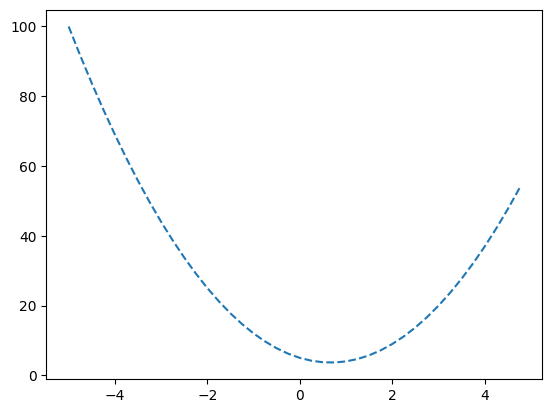

In [5]:
plt.plot(Xs, Ys, "--")
plt.show()

## Derivative

- The derivative of a function captures the idea of `instantaneous rate of change`.
- In both calculus and machine learning, it tells you how a function's output, denoted by f(x), changes with respect to its input, represented by x.

In [6]:
h: float = 0.001  # A very small number
x: float = 3.0

f(x + h)

20.014003000000002

$$ y=3x^2 -4x + 5 $$

Slope is ...

$$ slope = 6x - 4 $$

If x = 3;
$$ slope = 6(3) - 4 = 14 $$

In [8]:
# Change in value divided by run. i.e. rise per run
slope: float = (f(x + h) - f(x)) / h
slope 

14.00300000000243

## Micro Grad Implementation

In [11]:
class Value:

    def __init__(self, data: int | float) -> None:
        self.data = data

    def __repr__(self) -> str:
        return f"{self.__class__.__name__}(data={self.data})"

    def __add__(self, other: "Value") -> "Value":
        """Addition of two values."""
        return Value(self.data + other.data)

    def __mul__(self, other: "Value") -> "Value":
        """Multiplication of two values."""
        return Value(self.data * other.data)

In [16]:
a = Value(data=2)
b = Value(data=6)

a, b

(Value(data=2), Value(data=6))

In [17]:
a + b, a * b

(Value(data=8), Value(data=12))